In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import norm
from scipy import special

In [2]:
def simulate_brownien_motion(x0 = 0, mean = 0, t0 = 0, T = 1, delta_t = 0.01 ):

    t = np.arange(t0,T, delta_t) # time axis

    delta_y = np.random.normal(loc = mean, scale = np.sqrt(delta_t), size=len(t)-1) 

    y = np.zeros(len(t))
    y[0] = x0
    temp = 0
    for i in range(y.shape[0]-1):
        y[i+1] = y[i] + delta_y[i] 

    return t, y

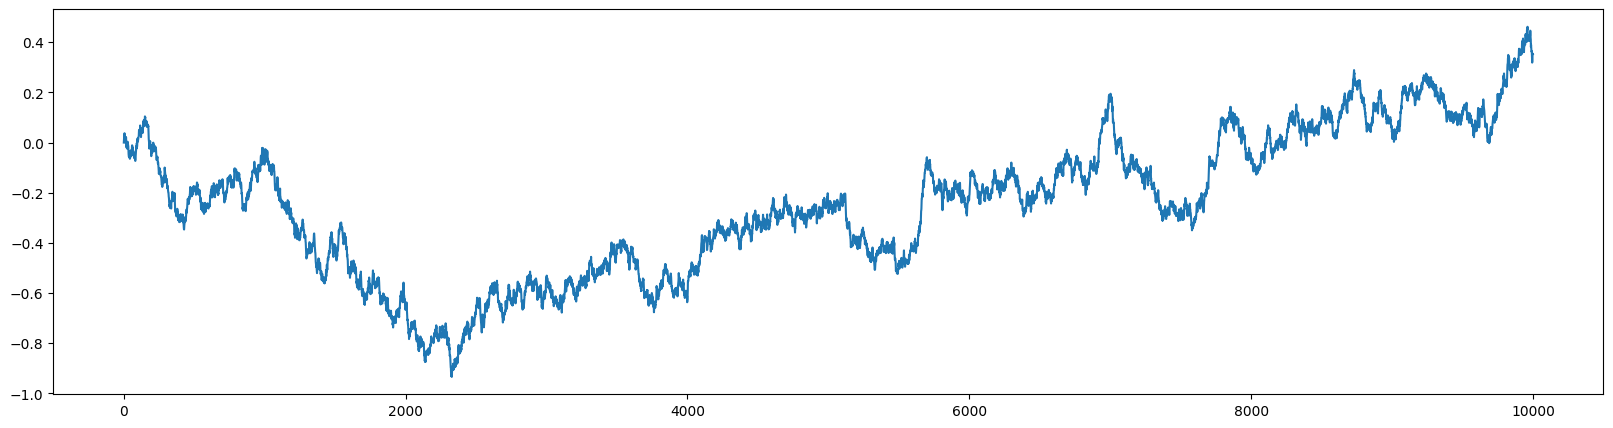

In [3]:
t, y = simulate_brownien_motion(delta_t = 0.0001)
plt.figure(figsize=(20,5)) 
plt.plot(y)

### The paper deals with diffusion first exit times : 
The fisrt time a stochastic process exits a given domain (real interval in case of unidimensionnal process)
As this is random, the objective is to simulate the distribution of this first time exit.

**The purpose of the paper is to highlight an acceleration procedure for <br> the GDET-algorithm based
on a multi-armed bandit model.**

Let's see some examples related to first time exits from [0, 0.01]

In [4]:
#interval [a, b]
a = 0
b = 0.01
Tmax = 1

# simulate brownien motion
t, y = simulate_brownien_motion(t0 = a , T = Tmax, delta_t = 0.0001)

if len(y[(y > b) + (y < a )]) > 0:
    first_time_exit = t[(y > b) + (y < a )][0]
    y_first_time_exit = y[(y > b) + (y < a )][0]
    print(f" first time exit : {first_time_exit}, with y = {y_first_time_exit}")
else:
    print("No exist time !")

 first time exit : 0.0001, with y = -0.0035923478021119342


$$
dX_{t} = \mu(X_{t}).dt + \sigma(X_{t}).dB_{t}, \space X_{0} = x \space \epsilon \space (a, b)

$$

In [5]:
def h_2_5(t, te = 0.5, K = None):   

    if K == None:
        K = np.pi * special.erf(np.sqrt(1/(2 * te)))
        K = K * np.exp((np.pi**2)*te/8)/2
        K = 1 / K

    if t <= te:
        temp = 1/(t**1.5)
        temp = temp * norm.pdf(1/np.sqrt(t))
    else:
        temp = np.pi/(4 * K)
        temp = temp * np.exp((-(np.pi**2)/8)*t)

    return temp


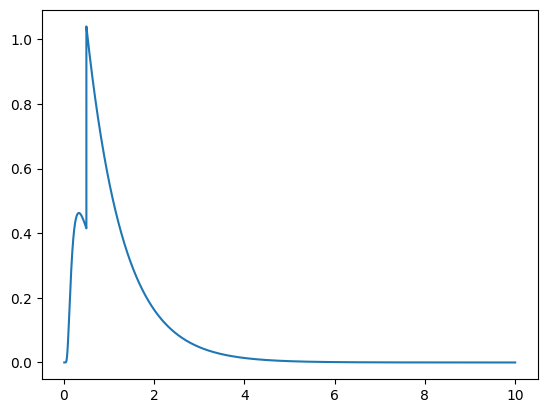

In [6]:
t = np.arange(0.01, 10, 0.0001)
h = [h_2_5(i) for i in t]
plt.plot(t, h)

In [7]:
special.erf(0.10)

0.1124629160182849

In [8]:
def CONVERGENT_SERIES_METHOD(K, h, fi):
    """
        Simulate a random variable with density f/I(f) and the global number 
        of terms of the series expansions used
        f(y) = Sigma f_i(y) , i >= 0
        I = Integral of f over IR
        
        f(y) ≤ κh(y)
    
    """
    return 0


In [9]:
def CONDTIONAL_DISTR(x, a, b , t):
    """
        x : starting point of the brownien motion
        a, b : endpoints of the interval of interest
        t : time
    """

    return 0, 0

In [10]:
def BROWNIAN_EXIT_SYMMETRIC():

    N_s = 0
    n = 0
    test = 0
    L0 = 0
    U0 = 1
    
    return 0, 0

In [11]:
def BROWNIAN_EXIT_ASYMM(x, a, b):
    
    """
        x : the starting value of the diffusion
        a, b : the interval of study
    """
    X = x
    T = 0
    test = 0
    L = a
    U = b
    N_as = 0

    while test == 0:
        D = min(X - L, U - X)
        to, N_s = BROWNIAN_EXIT_SYMMETRIC()
        S = D * D * to
        T = T + S
        N_as = N_as + N_s
        V = random.uniform(-D,D)
        X = X + V
        if (X > a) or (X < b):
            test = 1
        else:
            L = X - L
            U = U - X


    return T, X, N_as

In [12]:
def DIFFUSION_EXIT_TIME(gamma0, delta, beta, x, a, b):
    
    """
        gamma0 : parameter of the exponential distribution
        delta and beta are two functions
        x : the starting value of the diffusion
        a, b : the interval of study

    """

    N_tot = 0
    Z = x
    T = 0
    test = 0

    while test==0:
        # generate an exponential variable E
        E = np.random.exponential(gamma0, 1)
        
        # generate two uniform variables in [0, 1]
        U = random.uniform(0,1)
        V = random.uniform(0,1)
        
        # Simulate the Brownian exit time and location
        S, Y, N_as = BROWNIAN_EXIT_ASYMM(Z, a, b)  #################### TO BE IMPLEMENTED !
        N_tot = N_tot + N_as

        if S < E:
            if U < beta(Y):
                test = 1
                Z = Y
                T = T + S
        else:
            Yc , Nc = CONDTIONAL_DISTR(Z, a, b, E) #################### TO BE IMPLEMENTED !
            N_tot = N_tot + Nc
            if gamma0 * V <= delta(Yc):
                test = 0
            else:
                Z = Yc
                T = T + E
                test = 1

    return Z, T, N_tot



        
         


In [13]:
random.uniform(0,1)

0.6418109477543069

Due to both the translation invariance and the scaling
property of the Brownian motion, it suffices  to study time exit from [-1, 1] given that : 
$$ B_{0} = x \space \epsilon [-1, 1] $$